In [ ]:
#特徴量削除ver
#特徴量9(削除age/balance/contact/day/month/duration/campaign)

#スコア：

'使用特徴量9,duration",\'pdays\',\'previous\',\'job\',\'education\',\n    \'marital\',\'default\',\'housing\',"loan",'

In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [ ]:
#データ読込
df=pd.read_csv("/content/bank_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [ ]:
#使用col
use_cols = ["id",
    "duration",
    'pdays',
    'previous',
    'job',
    'education',
    'marital',
    'default',
    'housing',
    "loan",
          ]

In [ ]:
df_use = df[use_cols]

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   duration   27128 non-null  int64 
 2   pdays      27128 non-null  int64 
 3   previous   27128 non-null  int64 
 4   job        27128 non-null  object
 5   education  27128 non-null  object
 6   marital    27128 non-null  object
 7   default    27128 non-null  object
 8   housing    27128 non-null  object
 9   loan       27128 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [ ]:
def data_pre(df):
    #IDカテゴリー化
    df["id"]=df["id"].astype("category")

    #job列のダミー変数化
    dummies_housing=pd.get_dummies(df["job"], dtype=int,drop_first=True,prefix="job")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['job'], inplace=True)


    #education列のダミー変数化
    dummies_housing=pd.get_dummies(df["education"], dtype=int,drop_first=True,prefix="education")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['education'], inplace=True)

    #marital列のダミー変数化
    dummies_housing=pd.get_dummies(df["marital"], dtype=int,drop_first=True,prefix="marital")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['marital'], inplace=True)

    #default列のダミー変数化+置換
    dummies_housing=pd.get_dummies(df["default"], dtype=int,drop_first=True,prefix="default")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['default'], inplace=True)

    #housing列のダミー変数化+置換
    dummies_housing=pd.get_dummies(df["housing"], dtype=int,drop_first=True,prefix="housing")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['housing'], inplace=True)

    #loan列のダミー変数化
    dummies_housing=pd.get_dummies(df["loan"], dtype=int,drop_first=True,prefix="loan")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['loan'], inplace=True)


    return df


df_use["y"]=df["y"]
df_use=data_pre(df_use)

<ipython-input-8-4cd6c6e246de>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use["y"]=df["y"]
<ipython-input-8-4cd6c6e246de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"]=df["id"].astype("category")


In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   27128 non-null  category
 1   duration             27128 non-null  int64   
 2   pdays                27128 non-null  int64   
 3   previous             27128 non-null  int64   
 4   y                    27128 non-null  int64   
 5   job_blue-collar      27128 non-null  int64   
 6   job_entrepreneur     27128 non-null  int64   
 7   job_housemaid        27128 non-null  int64   
 8   job_management       27128 non-null  int64   
 9   job_retired          27128 non-null  int64   
 10  job_self-employed    27128 non-null  int64   
 11  job_services         27128 non-null  int64   
 12  job_student          27128 non-null  int64   
 13  job_technician       27128 non-null  int64   
 14  job_unemployed       27128 non-null  int64   
 15  job_unknown        

In [ ]:
df_use.corr()

,id,duration,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
id,1.000000,0.002705,-0.004526,-0.005425,-0.003555,0.004930,0.002452,-0.007486,0.001762,0.002032,...,0.000994,-0.006645,0.001820,0.001805,-0.006171,-0.001536,0.004125,0.003077,0.002384,0.007667
duration,0.002705,1.000000,0.002030,0.002489,0.401390,0.005908,0.003934,-0.010372,-0.009806,0.024644,...,0.021198,-0.008966,-0.001323,0.003799,0.002148,-0.018632,0.013641,-0.010041,0.008042,-0.010103
pdays,-0.004526,0.002030,1.000000,0.421606,0.100930,0.018139,-0.014195,-0.028079,-0.013875,-0.012303,...,-0.006487,-0.015619,0.022597,-0.010557,-0.006778,-0.025074,0.025228,-0.031555,0.128671,-0.019021
previous,-0.005425,0.002489,0.421606,1.000000,0.083825,-0.020051,-0.006844,-0.010539,0.013184,0.005046,...,-0.005428,-0.007512,-0.004031,0.022374,-0.007947,-0.009969,0.013445,-0.016082,0.035886,-0.008316
y,-0.003555,0.401390,0.100930,0.083825,1.000000,-0.071971,-0.017122,-0.014899,0.030974,0.077087,...,0.025624,-0.004015,-0.028497,0.059895,0.011429,-0.059377,0.062806,-0.017005,-0.140307,-0.065630
job_blue-collar,0.004930,0.005908,0.018139,-0.020051,-0.071971,1.000000,-0.098292,-0.089670,-0.269079,-0.122376,...,-0.091166,-0.042780,0.036857,-0.319547,0.017987,0.119145,-0.085707,0.014178,0.187858,0.024236
job_entrepreneur,0.002452,0.003934,-0.014195,-0.006844,-0.017122,-0.098292,1.000000,-0.031808,-0.095450,-0.043410,...,-0.032339,-0.015175,-0.055876,0.069478,0.009881,0.043077,-0.050440,0.021133,0.009628,0.034427
job_housemaid,-0.007486,-0.010372,-0.028079,-0.010539,-0.014899,-0.089670,-0.031808,1.000000,-0.087077,-0.039602,...,-0.029502,-0.013844,-0.072375,-0.056946,0.001041,0.047925,-0.062356,0.005638,-0.083174,-0.016028
job_management,0.001762,-0.009806,-0.013875,0.013184,0.030974,-0.269079,-0.095450,-0.087077,1.000000,-0.118837,...,-0.088530,-0.041543,-0.404298,0.597931,-0.038830,-0.032523,0.032669,0.003251,-0.069110,-0.042204
job_retired,0.002032,0.024644,-0.012303,0.005046,0.077087,-0.122376,-0.043410,-0.039602,-0.118837,1.000000,...,-0.040263,-0.018894,-0.033036,-0.067945,0.013928,0.077100,-0.120980,-0.012395,-0.159682,-0.017569


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae


df_train,df_val =train_test_split(df_use,test_size=0.2,random_state=42)

col = "y"
train_y = df_train[col]
train_x = df_train.drop(col,axis=1)

val_y = df_val[col]
val_x =df_val.drop(col,axis=1)

trains = lgb.Dataset(train_x,train_y)
valids = lgb.Dataset(val_x,val_y)

params = {
    'objective': 'binary',      # 二値分類
    'metric': 'binary_logloss',                # 評価指標：（ロジスティック損失）
    'num_leaves': 31,               # 葉の数
    'learning_rate': 0.1,          # 学習率
    'feature_fraction': 1.0,        # 特徴量のサブサンプル率
    'bagging_fraction': 1.0,        # バギングのサブサンプル率
    'bagging_freq': 5,              # バギングの頻度
    'max_depth': -1,                # ツリーの最大深さ（制限なし）
    'min_data_in_leaf': 1        # 葉の最小データ数
}

model = lgb.train(
    params,
    trains,
    valid_sets=valids,
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.240442


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# モデルの予測
pred_y = model.predict(val_x, num_iteration=model.best_iteration)

# 平均二乗誤差（MSE）や平均絶対誤差（MAE）の計算
mse = mean_squared_error(val_y, pred_y)
mae = mean_absolute_error(val_y, pred_y)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 0.07300304843986842, MAE: 0.14645631428890343


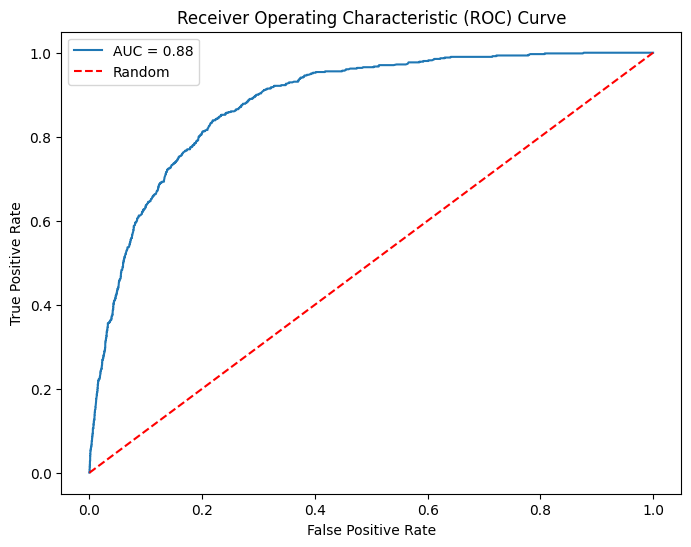

In [ ]:
# 予測値から確率に変換する関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# モデルの予測値を確率に変換
pred_probs = sigmoid(pred_y)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC曲線とAUCの計算
fpr, tpr, thresholds = roc_curve(val_y, pred_probs)
auc = roc_auc_score(val_y, pred_probs)

# ROC曲線のプロット
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(auc)

0.8838057468196416


In [ ]:
#データ読み込み
df_test=pd.read_csv("/content/bank_test.csv")

In [ ]:
df_test = df_test[use_cols]

In [ ]:
df_test = data_pre(df_test)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083 entries, 0 to 18082
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   18083 non-null  category
 1   duration             18083 non-null  int64   
 2   pdays                18083 non-null  int64   
 3   previous             18083 non-null  int64   
 4   job_blue-collar      18083 non-null  int64   
 5   job_entrepreneur     18083 non-null  int64   
 6   job_housemaid        18083 non-null  int64   
 7   job_management       18083 non-null  int64   
 8   job_retired          18083 non-null  int64   
 9   job_self-employed    18083 non-null  int64   
 10  job_services         18083 non-null  int64   
 11  job_student          18083 non-null  int64   
 12  job_technician       18083 non-null  int64   
 13  job_unemployed       18083 non-null  int64   
 14  job_unknown          18083 non-null  int64   
 15  education_secondary

In [ ]:
predict = model.predict(df_test)
df_test["y"]=predict

In [ ]:
df_ID=df_test["id"]
df_test["id"]=df_ID.astype(int)

In [ ]:
df_test.to_csv("sample_submit.csv",columns=['id', 'y'],index = False,header = False)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

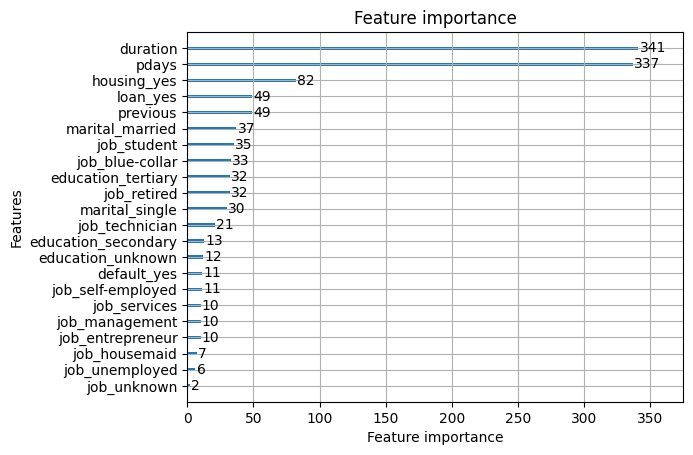

In [ ]:
lgb.plot_importance(model)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 予測（確率）
predict_prob = model.predict(val_x)


In [ ]:
# 予測（クラス）
threshold = 0.5
predict_class = (predict_prob >= threshold).astype(int)

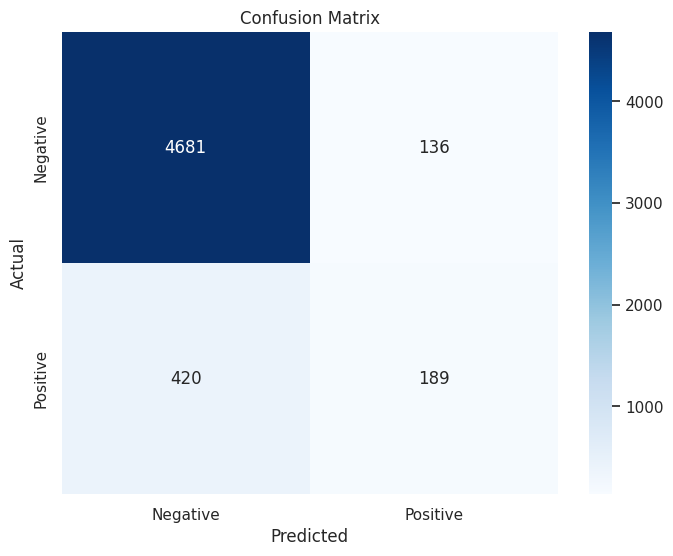

In [ ]:
sns.set()
# 混同行列
conf_matrix = confusion_matrix(val_y, predict_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
# 評価指標
accuracy = accuracy_score(val_y, predict_class)
precision = precision_score(val_y, predict_class)
recall = recall_score(val_y, predict_class)
f1 = f1_score(val_y, predict_class)
roc_auc = roc_auc_score(val_y, predict_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.90
Precision: 0.58
Recall: 0.31
F1 Score: 0.40
ROC AUC: 0.88
